<a href="https://colab.research.google.com/github/OPIM5512-yhi24001/A03_Sampling_yhi24001/blob/main/A03_Sampling_Arijita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

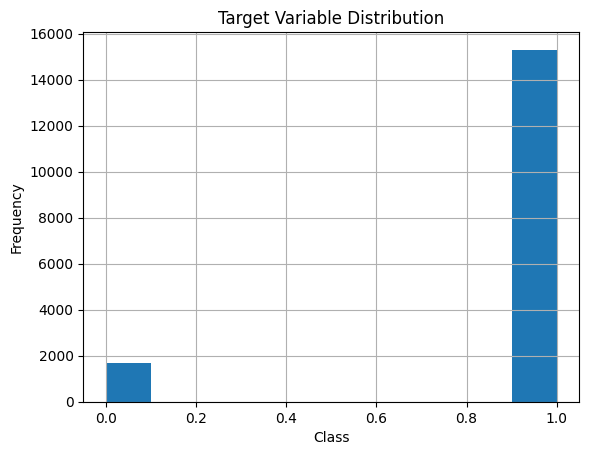


Majority Undersampling
Confusion Matrix
[[ 376   48]
 [ 602 3224]]

Classification Report
              precision    recall  f1-score   support

           0       0.38      0.89      0.54       424
           1       0.99      0.84      0.91      3826

    accuracy                           0.85      4250
   macro avg       0.68      0.86      0.72      4250
weighted avg       0.93      0.85      0.87      4250


Majority Oversampling
Confusion Matrix
[[ 375   49]
 [ 585 3241]]

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.88      0.54       424
           1       0.99      0.85      0.91      3826

    accuracy                           0.85      4250
   macro avg       0.69      0.87      0.73      4250
weighted avg       0.93      0.85      0.87      4250


SMOTE
Confusion Matrix
[[ 372   52]
 [ 551 3275]]

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.88   

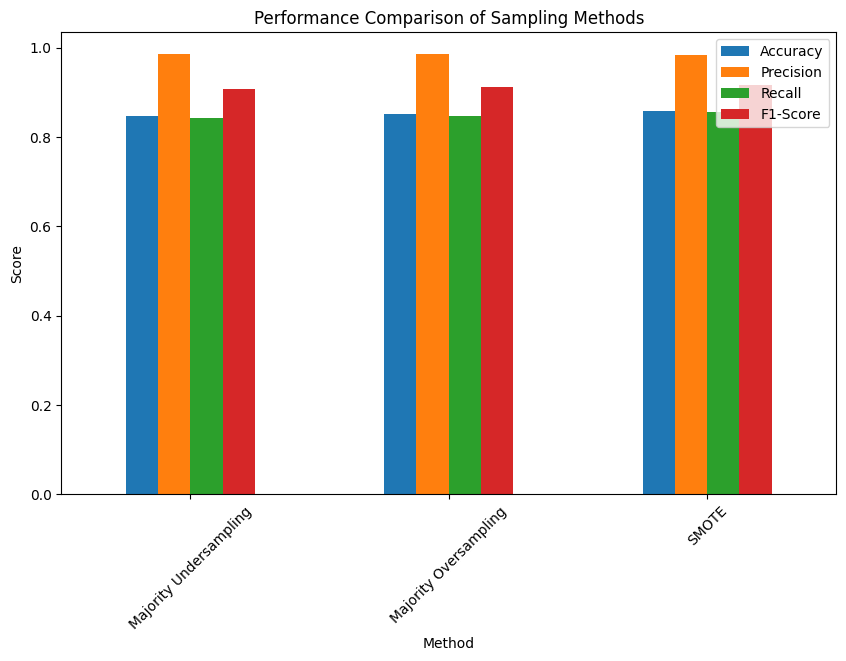

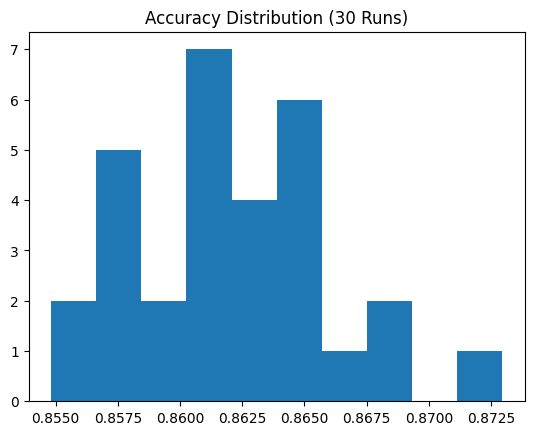

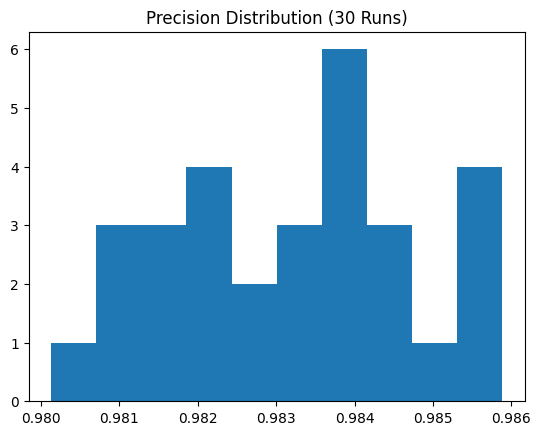

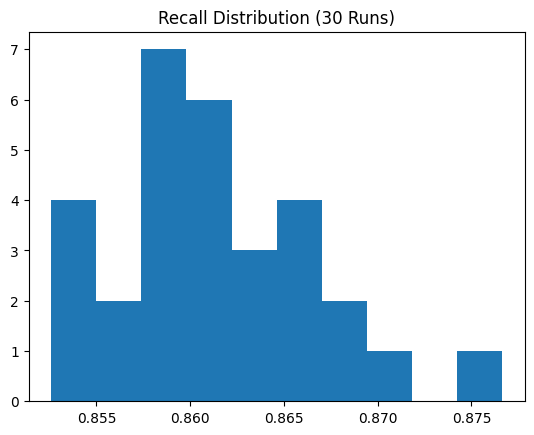

In [6]:
#Name: Arijita Pani
#Netid : yhi24001

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

#2. Load Dataset & Create Imbalanced Target
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

df.head()

# Create imbalanced binary target
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)

# Class distribution
df['median_house_value'].value_counts()

#Visualize Imbalance
df['median_house_value'].hist()
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

#3. Train–Test Split (Before Sampling)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

#4. Helper Function for Model Evaluation
results = []

def evaluate_model(method_name, X_train_res, y_train_res):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_res, y_train_res)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{method_name}")
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    results.append({
        "Method": method_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })

#5. Majority Undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

evaluate_model("Majority Undersampling", X_under, y_under)

#6. Minority Oversampling
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

evaluate_model("Majority Oversampling", X_over, y_over)

#7. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

evaluate_model("SMOTE", X_smote, y_smote)

#8. Comparison Table of Three Methods
comparison_df = pd.DataFrame(results)
comparison_df


#9. Bar Chart Comparison
comparison_df.set_index("Method")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10,6)
)

plt.title("Performance Comparison of Sampling Methods")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

#10. Reproducibility – Run SMOTE 30 Times
accuracy_list = []
precision_list = []
recall_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=i, stratify=y
    )

    smote = SMOTE(random_state=i)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_smote, y_train_smote)

    y_pred = model.predict(X_test)

    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))

#11. Metric Distributions (Histograms)
plt.hist(accuracy_list)
plt.title("Accuracy Distribution (30 Runs)")
plt.show()

plt.hist(precision_list)
plt.title("Precision Distribution (30 Runs)")
plt.show()

plt.hist(recall_list)
plt.title("Recall Distribution (30 Runs)")
plt.show()

(5 pts) Comments on the repeated experiment

The model performance varied across different train–test splits, showing that
results depend on how the data is partitioned.

Accuracy remained relatively stable across runs, indicating consistent overall prediction ability.

Precision and recall showed more fluctuation, especially recall, which was sensitive to minority class representation.

Some runs achieved high recall but lower precision, while others showed the opposite, highlighting the trade-off between these metrics.

The distributions of accuracy, precision, and recall across repeated runs resembled bell-shaped curves, suggesting stable average performance with natural variability.

Repeating the experiment multiple times provided a more reliable estimate of model performance compared to a single run.

Overall, SMOTE improved minority class prediction on average, but its effectiveness was not guaranteed for every data split.